In [1]:
from generator import Pattern_generator, pattern_mixer

In [2]:
import timesynth as ts
import numpy as np
import math
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
import random

In [3]:
%matplotlib inline

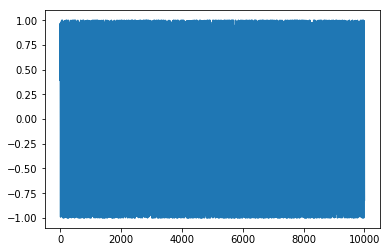

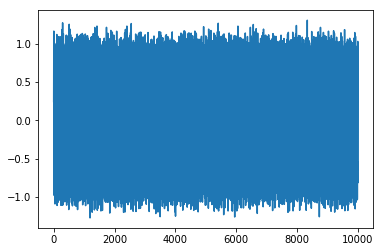

In [13]:
PG1 = Pattern_generator(series_length=10000, period=24, amplitude=1, std=0.1, ftype = np.sin, signal_type = ts.signals.Sinusoidal)
PG1.plot()
PG1.plot(False)
#ptl = [(24,48)]
#ml = [3]
#PG1.bump(position_tuple_list = ptl, magnitude_list = ml, bump_the_smoother_line = True)
#PG1.plot()
#PG1.plot(False)
#PG1.bump(position_tuple_list = ptl, magnitude_list = ml, bump_the_smoother_line = False)
#PG1.plot()
#PG1.plot(False)

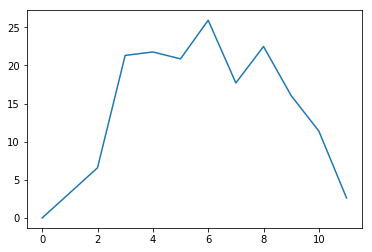

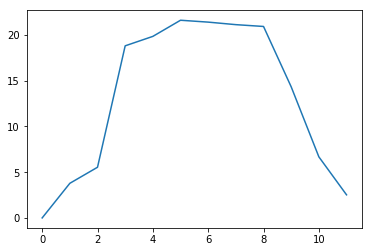

In [8]:
PG2 = Pattern_generator(series_length=12, period=24, amplitude=20, std=3, ftype = np.sin, signal_type = ts.signals.Sinusoidal)
y = PG2.get_bumpy_values()
y_min = np.min(y)
y = y - y_min
PG2.set_bumpy_values(y)
PG2.plot(False)
y = PG2.get_smooth_values()
y_min = np.min(y)
y = y - y_min
PG2.set_smooth_values(y)
PG2.plot()

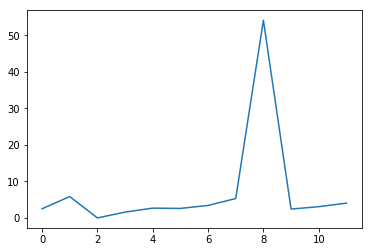

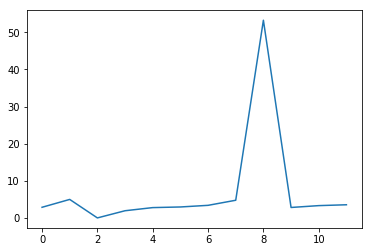

In [9]:
PG3 = Pattern_generator(series_length=12, period=12, amplitude=1, std=0.5, ftype = np.tan, signal_type = ts.signals.Sinusoidal)
y = PG3.get_bumpy_values()
y_min = np.min(y)
y = y - y_min
PG3.set_bumpy_values(y)
PG3.plot(False)
y = PG3.get_smooth_values()
y_min = np.min(y)
y = y - y_min
PG3.set_smooth_values(y)
PG3.plot()

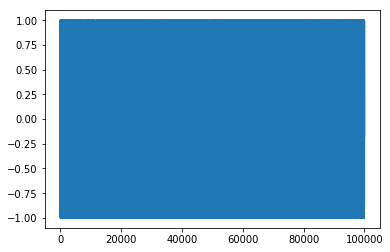

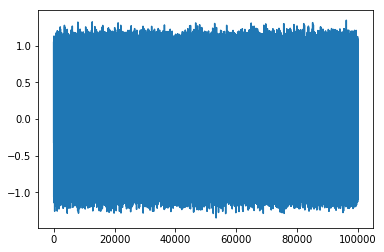

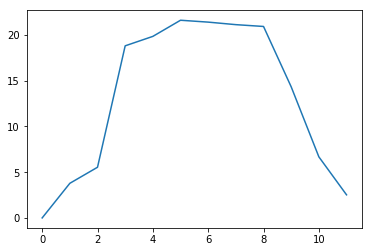

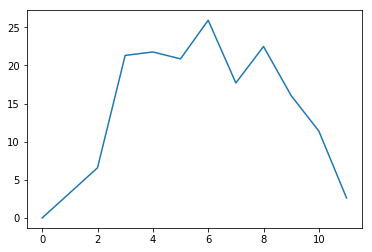

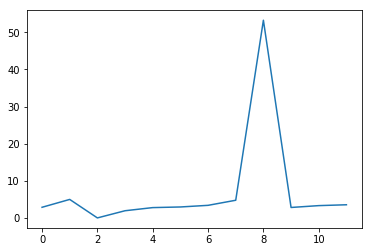

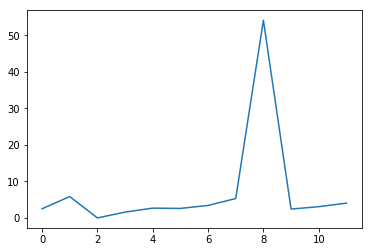

In [10]:
PG1.plot()
PG1.plot(False)
PG2.plot()
PG2.plot(False)
PG3.plot()
PG3.plot(False)

In [14]:
print(PG1.series_length)
print(PG2.series_length)
print(PG3.series_length)

# all periodic, __八__八__八___八__ (sin)
# all periodic, __八__八__八___八__ (pulse aka tan)
# all periodic, __--_____--____--___ (use Pattern_generator.bump only)
# all periodic, __/--\_____/--\______/--\___ (use Pattern_generator.bump and ramp)




10000
12
12
